# Implementation of Recursive Least Squares (RLS)
---
This project is devised by **Dr. Shasadeghi** and implemented by **Amirreza Yarahmadi**

## Introduction
---
The Recursive Least Squares (RLS) algorithm is a powerful adaptive filter algorithm that continuously updates the coefficients to minimize the weighted linear least squares cost function. It is widely used in various real-time signal processing applications due to its ability to adapt to changing environments and provide accurate predictions.

In this project, we will delve into the theory and mathematics behind the RLS algorithm, explore its applications, compare it with the Gradient Descent method, and implement the algorithm to predict values from a given dataset.

## Applications of RLS
---
The RLS algorithm is widely used in various fields due to its adaptive nature and accuracy. Some notable applications include:

- **Signal Processing**: Adaptive noise cancellation, echo cancellation, and channel equalization.
- **Control Systems**: System identification and adaptive control.
- **Economics and Finance**: Time-series prediction and adaptive market modeling.
- **Communications**: Adaptive filtering in communication systems for noise reduction and signal enhancement.

## RLS vs Gradient Descent Methods
---
#### Recursive Least Squares (RLS)

- **Adaptivity**: RLS is highly adaptive and updates the model parameters recursively with each new data point.
- **Convergence**: RLS typically converges faster compared to gradient descent methods due to its second-order nature.
- **Complexity**: The computational complexity of RLS is higher, especially with large datasets, due to the matrix inversion step.

#### Gradient Descent

- **Simplicity**: Gradient descent methods are simpler to implement and understand.
- **Flexibility**: They can be applied to a wide range of optimization problems, including non-linear and non-convex functions.
- **Computational Efficiency**: Gradient descent is generally more computationally efficient for large datasets, especially with batch or stochastic variations.

Both RLS and gradient descent methods have their own advantages and are suitable for different types of problems. RLS is preferred for adaptive filtering and real-time applications, while gradient descent is widely used for training machine learning models.


## Theory and Mathematics of RLS
---
Recursive Least Squares (RLS) is an adaptive filter algorithm that recursively finds the coefficients $ \theta $ that minimize a weighted linear least squares cost function relating to the input signals. This method is particularly useful for real-time signal processing where the system model parameters need to be updated continuously as new data comes in.

The RLS algorithm assumes a linear relationship between the input vector $ b^T $ and the output $ f(x) $, modeled as:
$$ f(x) = b^T \theta $$

### Objective
The objective of the RLS algorithm is to minimize the sum of weighted squared errors:
$$ J_p = \sum_{j=1}^{p} \lambda^{t−i} (f({x_0}^j) - {y_0}^j)^2 $$
where $ \lambda $ (0 < $\lambda$ ≤ 1) is the forgetting factor that gives exponentially less weight to older data.

### The algorithm

1. **Initialization:**
   - Initialize the weight vector $ \theta_0 $ (often starting with zeros).
   - Initialize the inverse correlation matrix $ P_0 $ (often starting with a large value times the identity matrix).

   $$ \theta_0 = 0 $$
   $$ P_0 = \alpha I $$
   where $ \alpha $ is a large positive constant and $ I $ is the identity matrix.

2. **For each step $ p $:**
   - Compute the a priori error:
  
     $$ y_p = f_p(x) = b^T(x_0^p) \theta_{p} $$
     $$ e_p = y_p - b^T(x_0^p) \theta_{p-1} $$

   - Compute the gain vector $ K_p $ (the Kalman gain):
     $$ K_p = \frac{P_{p-1} b(x_0^p)}{\lambda + b(x_0^p)^T P_{p-1} b(x_0^p)} $$

   - Update the weight vector:
     $$ \theta_p = \theta_{p-1} + K_p e_p $$

   - Update the inverse correlation matrix:
     $$ P_p = \frac{1}{\lambda} \left( P_{p-1} - K_p b(x_0^p)^T P_{p-1} \right) $$

3. **Compute the cost function $ J_p(\theta) $:**
   $$ J_p(\theta) = \sum_{i=1}^{t} \lambda^{t-i} (y_i - x_i^T \theta)^2 $$

## Program Implementing
---

### Algorithm implementing
1. **RLS algorithm with cost function computation**

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def rls_algo(n_features, data):
    n_features = 4 # Number of inputs
    w = np.zeros(n_features) # The theta matrix
    P = np.eye(n_features) * 1000  # Large initial covariance, alpha = 1000
    lambda_ = 1  # Forgetting factor, Default 1

    y_pred = np.zeros(len(data)) # Initialize array for predictions values
    J_p = np.zeros(len(data)) # Initialize array for cost function values

    for p in range(len(data)):
        x_p = data.iloc[p, :-1].values # The value of "b"
        y_p = data.iloc[p, -1]
    
        y_pred[p] = np.dot(x_p, w)
        error = y_p - y_pred[p]
           
        K_p = np.dot(P, x_p) / (lambda_ + np.dot(x_p.T, np.dot(P, x_p)))
        w += K_p * error # The "theta"
        P = (P - np.outer(K_p, np.dot(x_p.T, P))) / lambda_
           
        # Update the cost function J_t(w) incrementally
        if p == 0:
            J_p[p] = error**2
        else:
            J_p[p] = lambda_ * J_p[p-1] + error**2

    return w, P, y_pred, J_p

2. **Loading data and runnig the algorithm**

In [25]:
# Import the data from the csv file
data = pd.read_csv('data/rls_data_unsortted.csv')

# Compute the "Y_prediction" and the "theta" matrixs
w, P, y_pred, J_p = rls_algo(4, data)

print(f"data shape: {data.shape}", f"Theta matrix: {w}", sep='\n')

data shape: (78, 5)
Theta matrix: [ 6.65935967  9.7137996  -5.94429704  2.8898571 ]


The dataset contains four input variables (`x1`, `x2`, `x3`, `x4`) and one output variable (`y`). An example of the dataset is shown below:

|  x1   | x2 |  x3   |  x4  |   y   |
|-------|----|-------|-------|-------|
| 14.57 |  0 | 14.51 | 0.06  | 15.31 |
| 15.31 |  0 | 15.29 | 0.02  | 14.76 |
| 14.76 |  0 | 14.72 | 0.04  | 18.60 |

3. **Plotting true vs predicted values and cost function**:

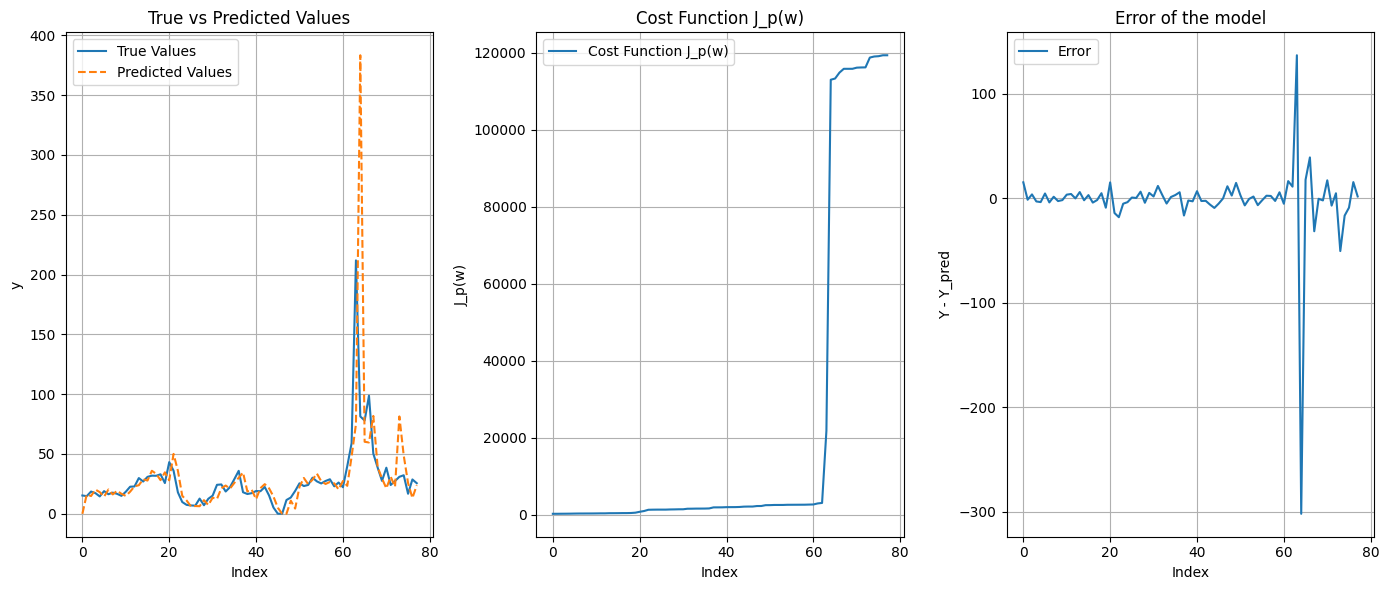

In [28]:
plt.figure(figsize=(14, 6))
   
plt.subplot(1, 3, 1)
plt.plot(data.index, data['y'], label='True Values')
plt.plot(data.index, y_pred, label='Predicted Values', linestyle='--')
plt.xlabel('Index')
plt.ylabel('y')
plt.legend()
plt.title('True vs Predicted Values')
plt.grid()

plt.subplot(1, 3, 2)
plt.plot(range(len(data)), J_p, label='Cost Function J_p(w)')
plt.xlabel('Index')
plt.ylabel('J_p(w)')
plt.legend()
plt.title('Cost Function J_p(w)')
plt.grid()

plt.subplot(1, 3, 3)
plt.plot(range(len(data)), data['y'] - y_pred, label='Error')
plt.xlabel('Index')
plt.ylabel('Y - Y_pred')
plt.legend()
plt.title('Error of the model')
plt.grid()

plt.tight_layout()
plt.show()

As you can see around the data index 64 the model have a giant error and its due to the abnormality (noise) of the data. $ J_p(w) $ also have a giant rise in that change of error.

It's the nature of this algorithm and it can extract the details of changes in system and parameters.

### Testing and expanding the algorithm
Let's use a larger dataset and see the results.

data shape: (930, 5)
Theta matrix: [ 0.42847911  0.95064345  0.56177522 -1.08393956]





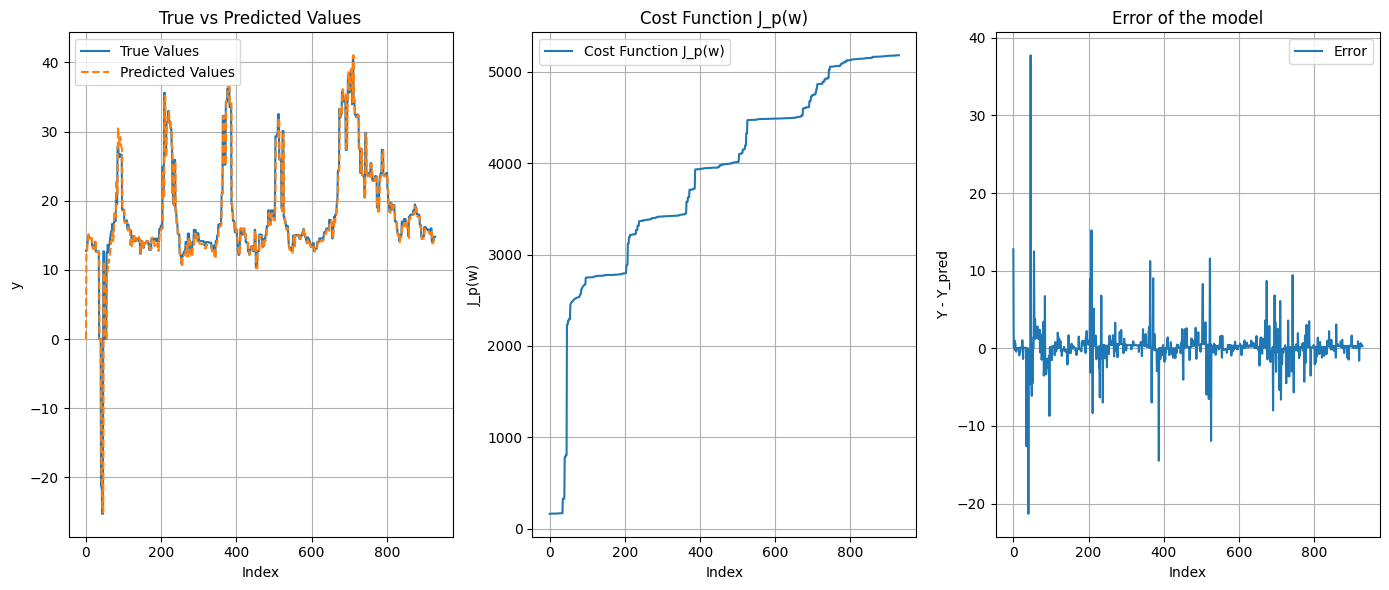

In [32]:
# Import the data from the csv file
data = pd.read_csv('data/actual_data.csv')

# Compute the "Y_prediction" and the "theta" matrixs
w, P, y_pred, J_p = rls_algo(4, data)b

print(f"data shape: {data.shape}", f"Theta matrix: {w}", sep='\n')

As shown in the figures using larger datasets and more continuous results in a better output. Also its clear that bigger rate of changes in **$ Y $** can diverge the model.

#### Train-Test program model
Now we want to train a model using a dataset and test it and see the results.
First of all we use the same `rls_algo` function to train a model using a dataset and get the $ \theta $ matrix. Then we use that $ \theta $ matrix on the test dataset to get a prediction of $ Y $ for the test data.
In this example we use the same data from the begining and assume that the first 60 pairs of data are for the training and the rest of them for testing.

Train data shape: (60, 5), Test data shape: (18, 5)
Theta matrix: [ 12.61889662  -8.77024562 -11.8419738   33.23111604]





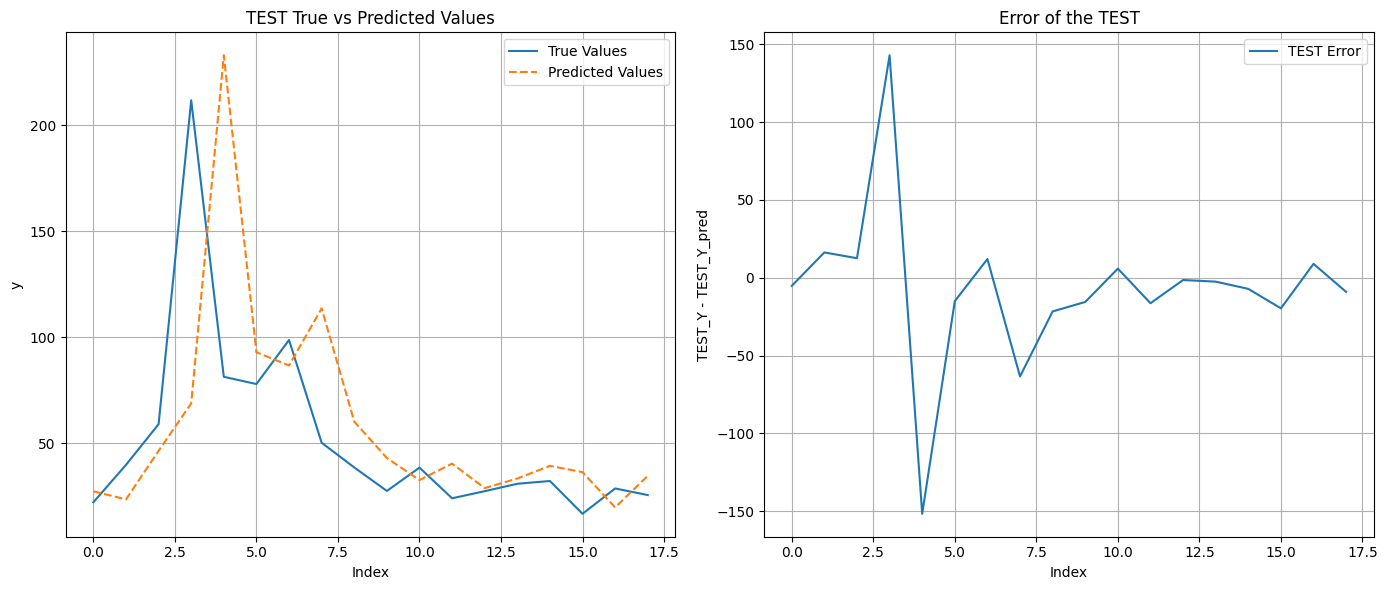

In [47]:
# Import the data from the csv file
data = pd.read_csv('data/rls_data_unsortted.csv')
train_data = data[:60]
test_data = data[60:]

# Compute the "Y_prediction" and the "theta" matrixs
w, P, y_pred, J_p = rls_algo(4, train_data)

print(f"Train data shape: {train_data.shape}, Test data shape: {test_data.shape}", f"Theta matrix: {w}", sep='\n')

# Computing the y_pred for the test data
test_data = test_data[['x1', 'x2', 'x3', 'x4', 'y']].to_numpy()
test_xs = np.array([test_data[:, 0], test_data[:, 1], test_data[:, 2], test_data[:, 3],])
test_ys = np.array([test_data[:, 4]])[0]
test_y_pred = w @ test_xs

## Conclusion
--
In this project, we explored the Recursive Least Squares (RLS) algorithm, including its theory, mathematics, and applications. We implemented the RLS algorithm in Python and demonstrated its use in predicting values from a given dataset. We also compared the RLS algorithm with gradient descent methods, highlighting their respective advantages and applications.

The RLS algorithm's adaptive nature makes it particularly suitable for real-time signal processing and control systems, where quick adaptation to changing environments is crucial. Despite its higher computational complexity, RLS provides faster convergence and better accuracy in many cases.

By understanding and implementing the RLS algorithm, we gain valuable insights into adaptive filtering techniques and their applications in various fields.


## Future Work
---
Future work can involve exploring other adaptive filtering algorithms such as the Kalman filter, extended RLS algorithms, and their applications in more complex and non-linear systems. Additionally, investigating the impact of different forgetting factors and initialization parameters on the performance of the RLS algorithm can provide deeper insights into its optimization.

---
This project is done by [Amirreza Yarahmadi](https://github.com/amirreza-yar). Access the source code and docs from [this repo](https://github.com/amirreza-yar/fuzzy-recursive-least-squares)